In [20]:
import torch
import torch.nn as nn
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant classes

In [21]:
data = pd.read_csv("../Data/list_attr_celeba.csv")

In [22]:
data.head()

,Path,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [23]:
Class_selected = ["Eyeglasses","Wearing_Hat","Wavy_Hair","Goatee"]
data_class = []
for i,type_class in enumerate(Class_selected):
    df = data.query(type_class + " == 1")
    Class_bis = Class_selected.copy()
    Class_bis.pop(i)
    for other_class in Class_bis:
        df = df.query(other_class + " == -1")
    df = df.sample(frac=1)
    data_class.append(df)

In [29]:
data_class[1].shape

(6605, 41)

In [ ]:
Image_selected = []
Class = []
for i,data_f in enumerate(data_class):
    selection = data_f["Path"].iloc[:2500].to_numpy()
    Image_selected.append(selection)
    class_selection = np.ones_like(selection)*i
    Class.append(class_selection)
Image_selected = np.concatenate(Image_selected,axis=0).reshape(-1,1)
Class = np.concatenate(Class,axis=0).reshape(-1,1)
Final_base = pd.DataFrame(np.concatenate((Image_selected,Class),axis=1),columns=["Path","Class"])
Final_base.to_csv("../Data/image_selected.csv",index=False)

# Perform a test

In [ ]:
# Import the data
path = ["../Data/example_photo/004937.jpg",
        "../Data/example_photo/008737.jpg",
        "../Data/example_photo/007367.jpg",
        "../Data/example_photo/160675.jpg"]


operator = nn.AvgPool2d(2, stride=2)
img_tensor = torch.empty(4,1,218,178)
img_color_tensor = torch.empty(4,218,178,3)

for i,path_im in enumerate(path):
    
    image = cv2.cvtColor(cv2.imread(path_im),cv2.COLOR_BGR2RGB).astype(float)/255 # RGB image

    gray = cv2.cvtColor(cv2.imread(path_im), cv2.COLOR_BGR2GRAY).astype(float)/255 # gray scale image
    assert(gray.shape == (218,178))
    
    img_color_tensor[i] = torch.from_numpy(image)
    img_tensor[i,0,:,:] = torch.from_numpy(gray)
    

operator = nn.AvgPool2d(2, stride=2)
reduc_img_tensor = operator(img_tensor)

figure = plt.figure(figsize=[25,8])

for i,path in enumerate(path):
    ax1 = figure.add_subplot(2,6,3*i+1)
    ax2 = figure.add_subplot(2,6,3*i+2)
    ax3 = figure.add_subplot(2,6,3*i+3)
    ax1.imshow(img_color_tensor[i])
    ax2.imshow(img_tensor[i,0],cmap='Greys_r')
    ax3.imshow(reduc_img_tensor[i,0],cmap='Greys_r')
    ax1.set_title("Original image Class " + str(i))
    ax2.set_title("Gray scale image Class " + str(i))
    ax3.set_title("Averaged image Class " + str(i))
plt.show()

In [30]:
data = pd.read_csv("../Data/data_frame.csv")

In [31]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702
0,112861.jpg,0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.094118,0.088235,0.090196,0.086275,0.080392,0.094118,0.086275,0.098039,0.080392,0.094118
1,017098.jpg,0,0.435294,0.449020,0.454902,0.450980,0.445098,0.452941,0.460784,0.458824,...,0.113725,0.115686,0.103922,0.115686,0.119608,0.119608,0.111765,0.109804,0.111765,0.109804
2,127655.jpg,0,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,...,0.145098,0.141176,0.129412,0.125490,0.151961,0.143137,0.150980,0.113725,0.092157,0.066667
3,191036.jpg,0,0.405882,0.400000,0.409804,0.431373,0.445098,0.460784,0.476471,0.482353,...,0.176471,0.201961,0.200000,0.203922,0.209804,0.168627,0.198039,0.182353,0.156863,0.180392
4,137550.jpg,0,0.277451,0.267647,0.275490,0.236275,0.199020,0.180392,0.185294,0.187255,...,0.739216,0.717647,0.601961,0.470588,0.374510,0.541176,0.699020,0.714706,0.708824,0.678431
5,030905.jpg,0,0.886275,0.886275,0.886275,0.886275,0.886275,0.886275,0.886275,0.886275,...,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725
6,005583.jpg,0,0.027451,0.027451,0.027451,0.027451,0.029412,0.037255,0.039216,0.037255,...,0.791176,0.804902,0.818627,0.759804,0.767647,0.774510,0.772549,0.754902,0.772549,0.739216
7,160187.jpg,0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.062745,0.076471,0.070588,0.078431,0.072549,0.080392,0.086275,0.109804,0.115686,0.109804
8,048506.jpg,0,0.046078,0.050000,0.051961,0.055882,0.053922,0.067647,0.048039,0.143137,...,0.196078,0.623529,0.778431,0.760784,0.770588,0.762745,0.762745,0.764706,0.737255,0.741176
9,163216.jpg,0,0.784314,0.786275,0.790196,0.792157,0.792157,0.792157,0.792157,0.792157,...,0.866667,0.854902,0.835294,0.856863,0.856863,0.858824,0.819608,0.782353,0.786275,0.805882


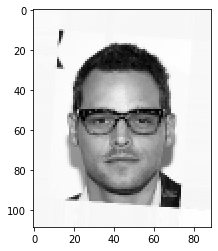

In [41]:
img = data.iloc[5].to_numpy()
img = img[2:].astype(float).reshape(109,89)
plt.imshow(img,'Greys_r')